In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset

df =pd.read_csv("customer_booking.csv",encoding= "ISO-8859-1")

## 1. Understand the Data Structure:

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape

(50000, 14)

##### There are 50000 rows and 14 columns

In [5]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

## 2. Descriptive Statistics:

-`Summary Statistics`: Get summary statistics for numerical columns (mean, median, standard deviation, etc.).

-`Distribution of -Numerical Features`: Check the distribution of numerical features using histograms or boxplots.

In [31]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

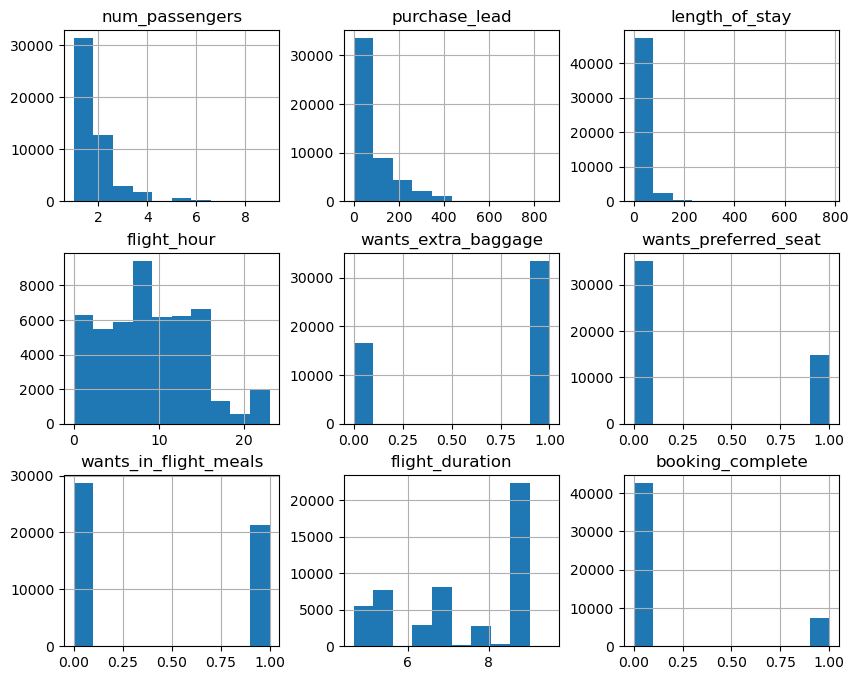

In [ ]:
# Distribution of numerical features
df.hist(figsize=(10, 8))
plt.show()

## 3. Univariate Analysis:

`Categorical Variables`: Examine the frequency distribution of categorical variables (e.g., sales_channel, trip_type).

`Numerical Variables`: Analyze the distribution of numerical variables (e.g., purchase_lead, length_of_stay).

In [ ]:
columns =['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete']

for i in columns:
    unique_values =df[i].unique()
    print(f'{i}: {unique_values}')
    print(f'length of {i} :{len(unique_values)}  \n')

num_passengers: [2 1 3 4 6 5 7 9 8]
length of num_passengers :9  

sales_channel: ['Internet' 'Mobile']
length of sales_channel :2  

trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
length of trip_type :3  

purchase_lead: [262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135 222  64 162 150  73 133

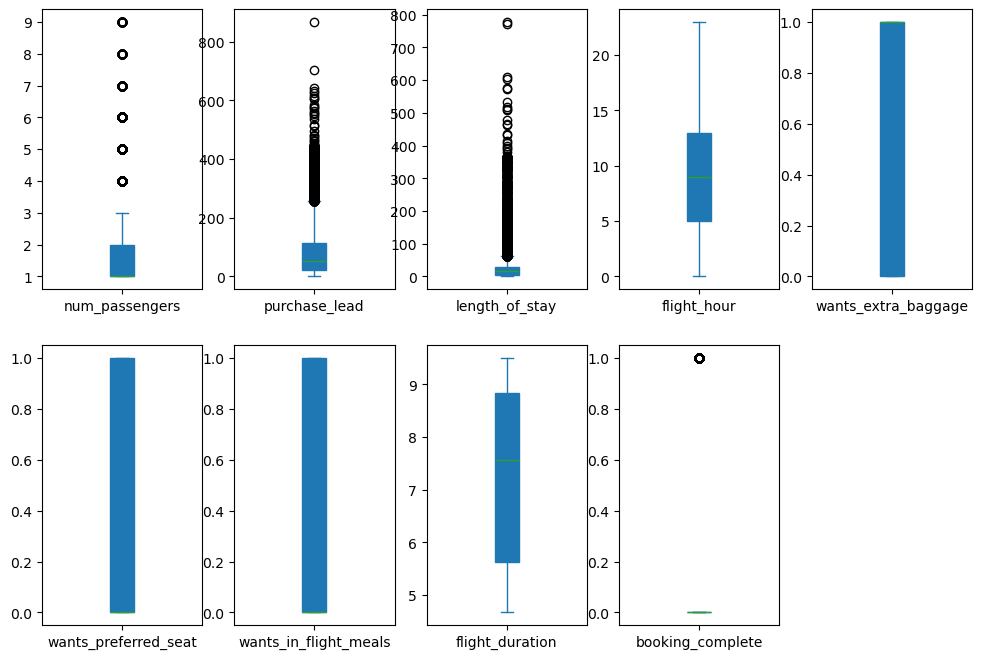

In [ ]:
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']

df[numerical_columns].plot(kind='box' ,subplots=True, layout=(2,5),figsize=(12, 8),patch_artist=True)
plt.show()

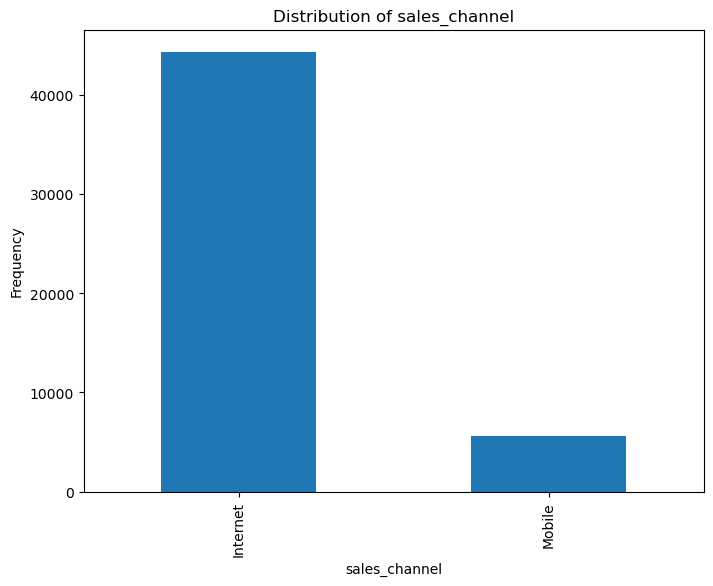

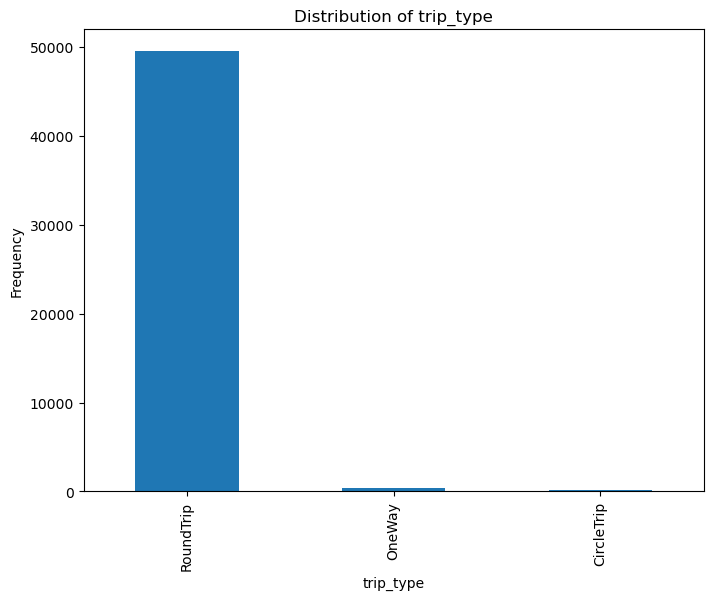

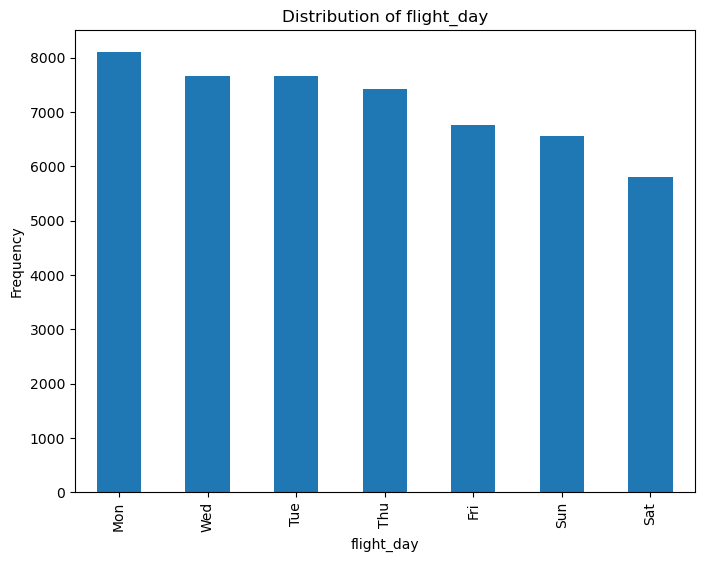

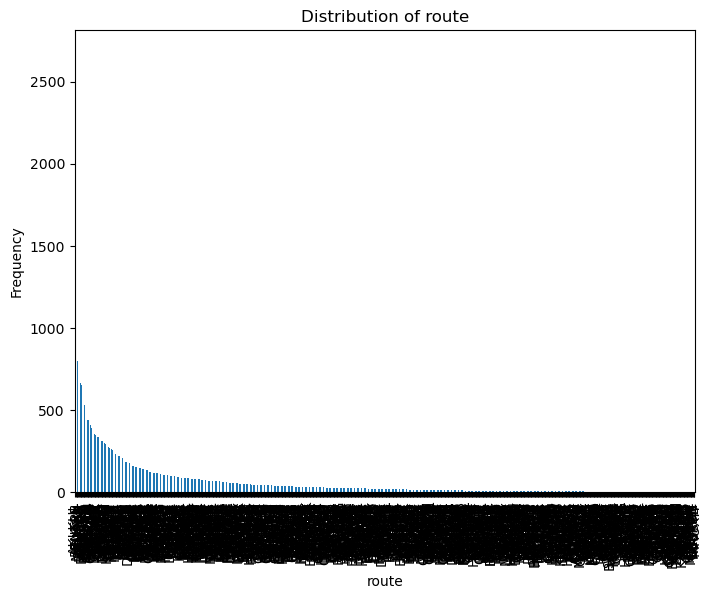

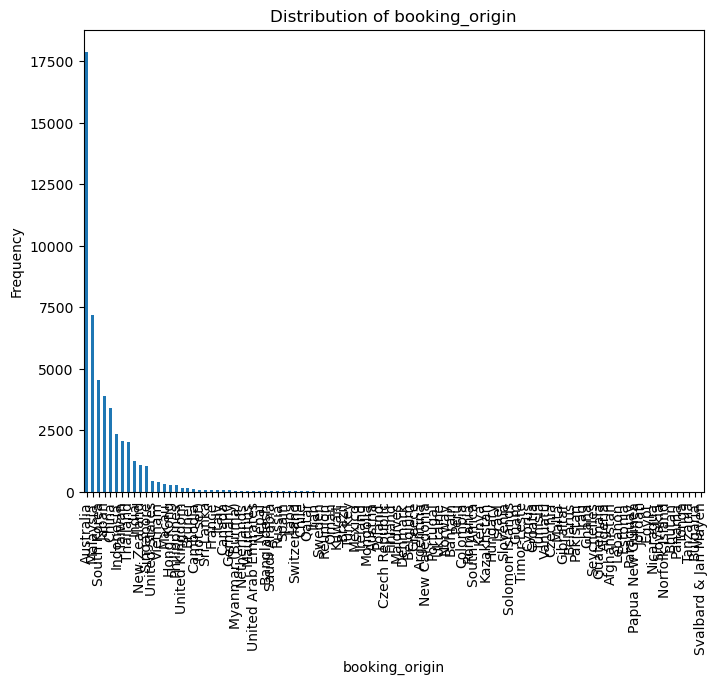

In [ ]:
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
categorical_columns

for column in categorical_columns:
    val_count =df[column].value_counts()
    val_count.plot(kind='bar', figsize=(8, 6))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## 4. Bivariate Analysis:

`Correlation Matrix`: Check the correlation between numerical variables.

`Pairwise Relationships`: Use scatter plots or pair plots to visualize relationships between pairs of numerical variables.

`Categorical vs. Numerical`: Use boxplots to compare distributions of numerical variables across different categories.

C:\Users\hp\AppData\Local\Temp\ipykernel_14600\4150578578.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()


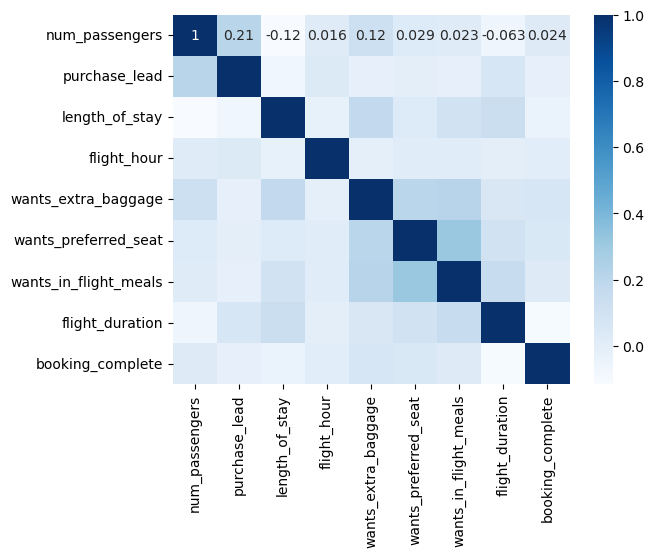

In [ ]:
#correlation matrix - Check the correlation between numerical variables

correlation_matrix =df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14600\3418358397.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat =df.corr()


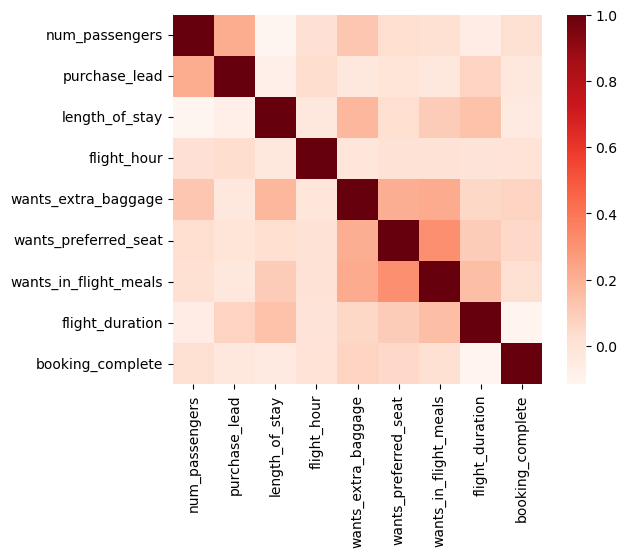

In [ ]:
corr_mat =df.corr()


sns.heatmap(corr_mat, square = True, cmap = 'Reds',)
pass

##### Based on the correlation heatmap provided, here are some insights:

1. Booking Completion (booking_complete):
The target variable (booking_complete) has relatively low correlations with most of the other features. The strongest positive correlation is with purchase_lead, which suggests that longer lead times might slightly increase the likelihood of booking completion. However, this correlation is still weak.
All other features have very weak correlations with booking_complete, indicating that no single feature strongly predicts whether a booking will be completed.

2. High Correlations Between Features:
There are several features with moderate to high correlations between each other:
length_of_stay and flight_hour: There’s a moderately positive correlation between these two, suggesting that longer stays might be associated with flights at specific times.
wants_preferred_seat, wants_in_flight_meals, and wants_extra_baggage: These features are moderately correlated with each other, implying that passengers who want one extra service are more likely to want others.

3. Low Correlation Across the Board:
Most features have low or no correlation with each other, which might be an indication of independent feature relationships. This could be beneficial for modeling, as it reduces the risk of multicollinearity, which can negatively impact model performance.

4. Feature Importance Consideration:
Since the correlation with the target is low, feature importance techniques like Random Forest or Gradient Boosting Trees could help in identifying which features contribute more to the prediction.

5. Potential Feature Engineering:
The weak correlation with the target suggests that you may need to consider feature engineering or adding new features that might better capture the underlying patterns. For example, combining some of the correlated features (e.g., wants_preferred_seat, wants_in_flight_meals, and wants_extra_baggage) into a single feature might improve model performance.

- In summary, while the features don’t show strong individual correlations with the target variable, this doesn’t rule out their importance. Further analysis, including feature importance evaluation and potential feature engineering, is recommended to improve model performance.

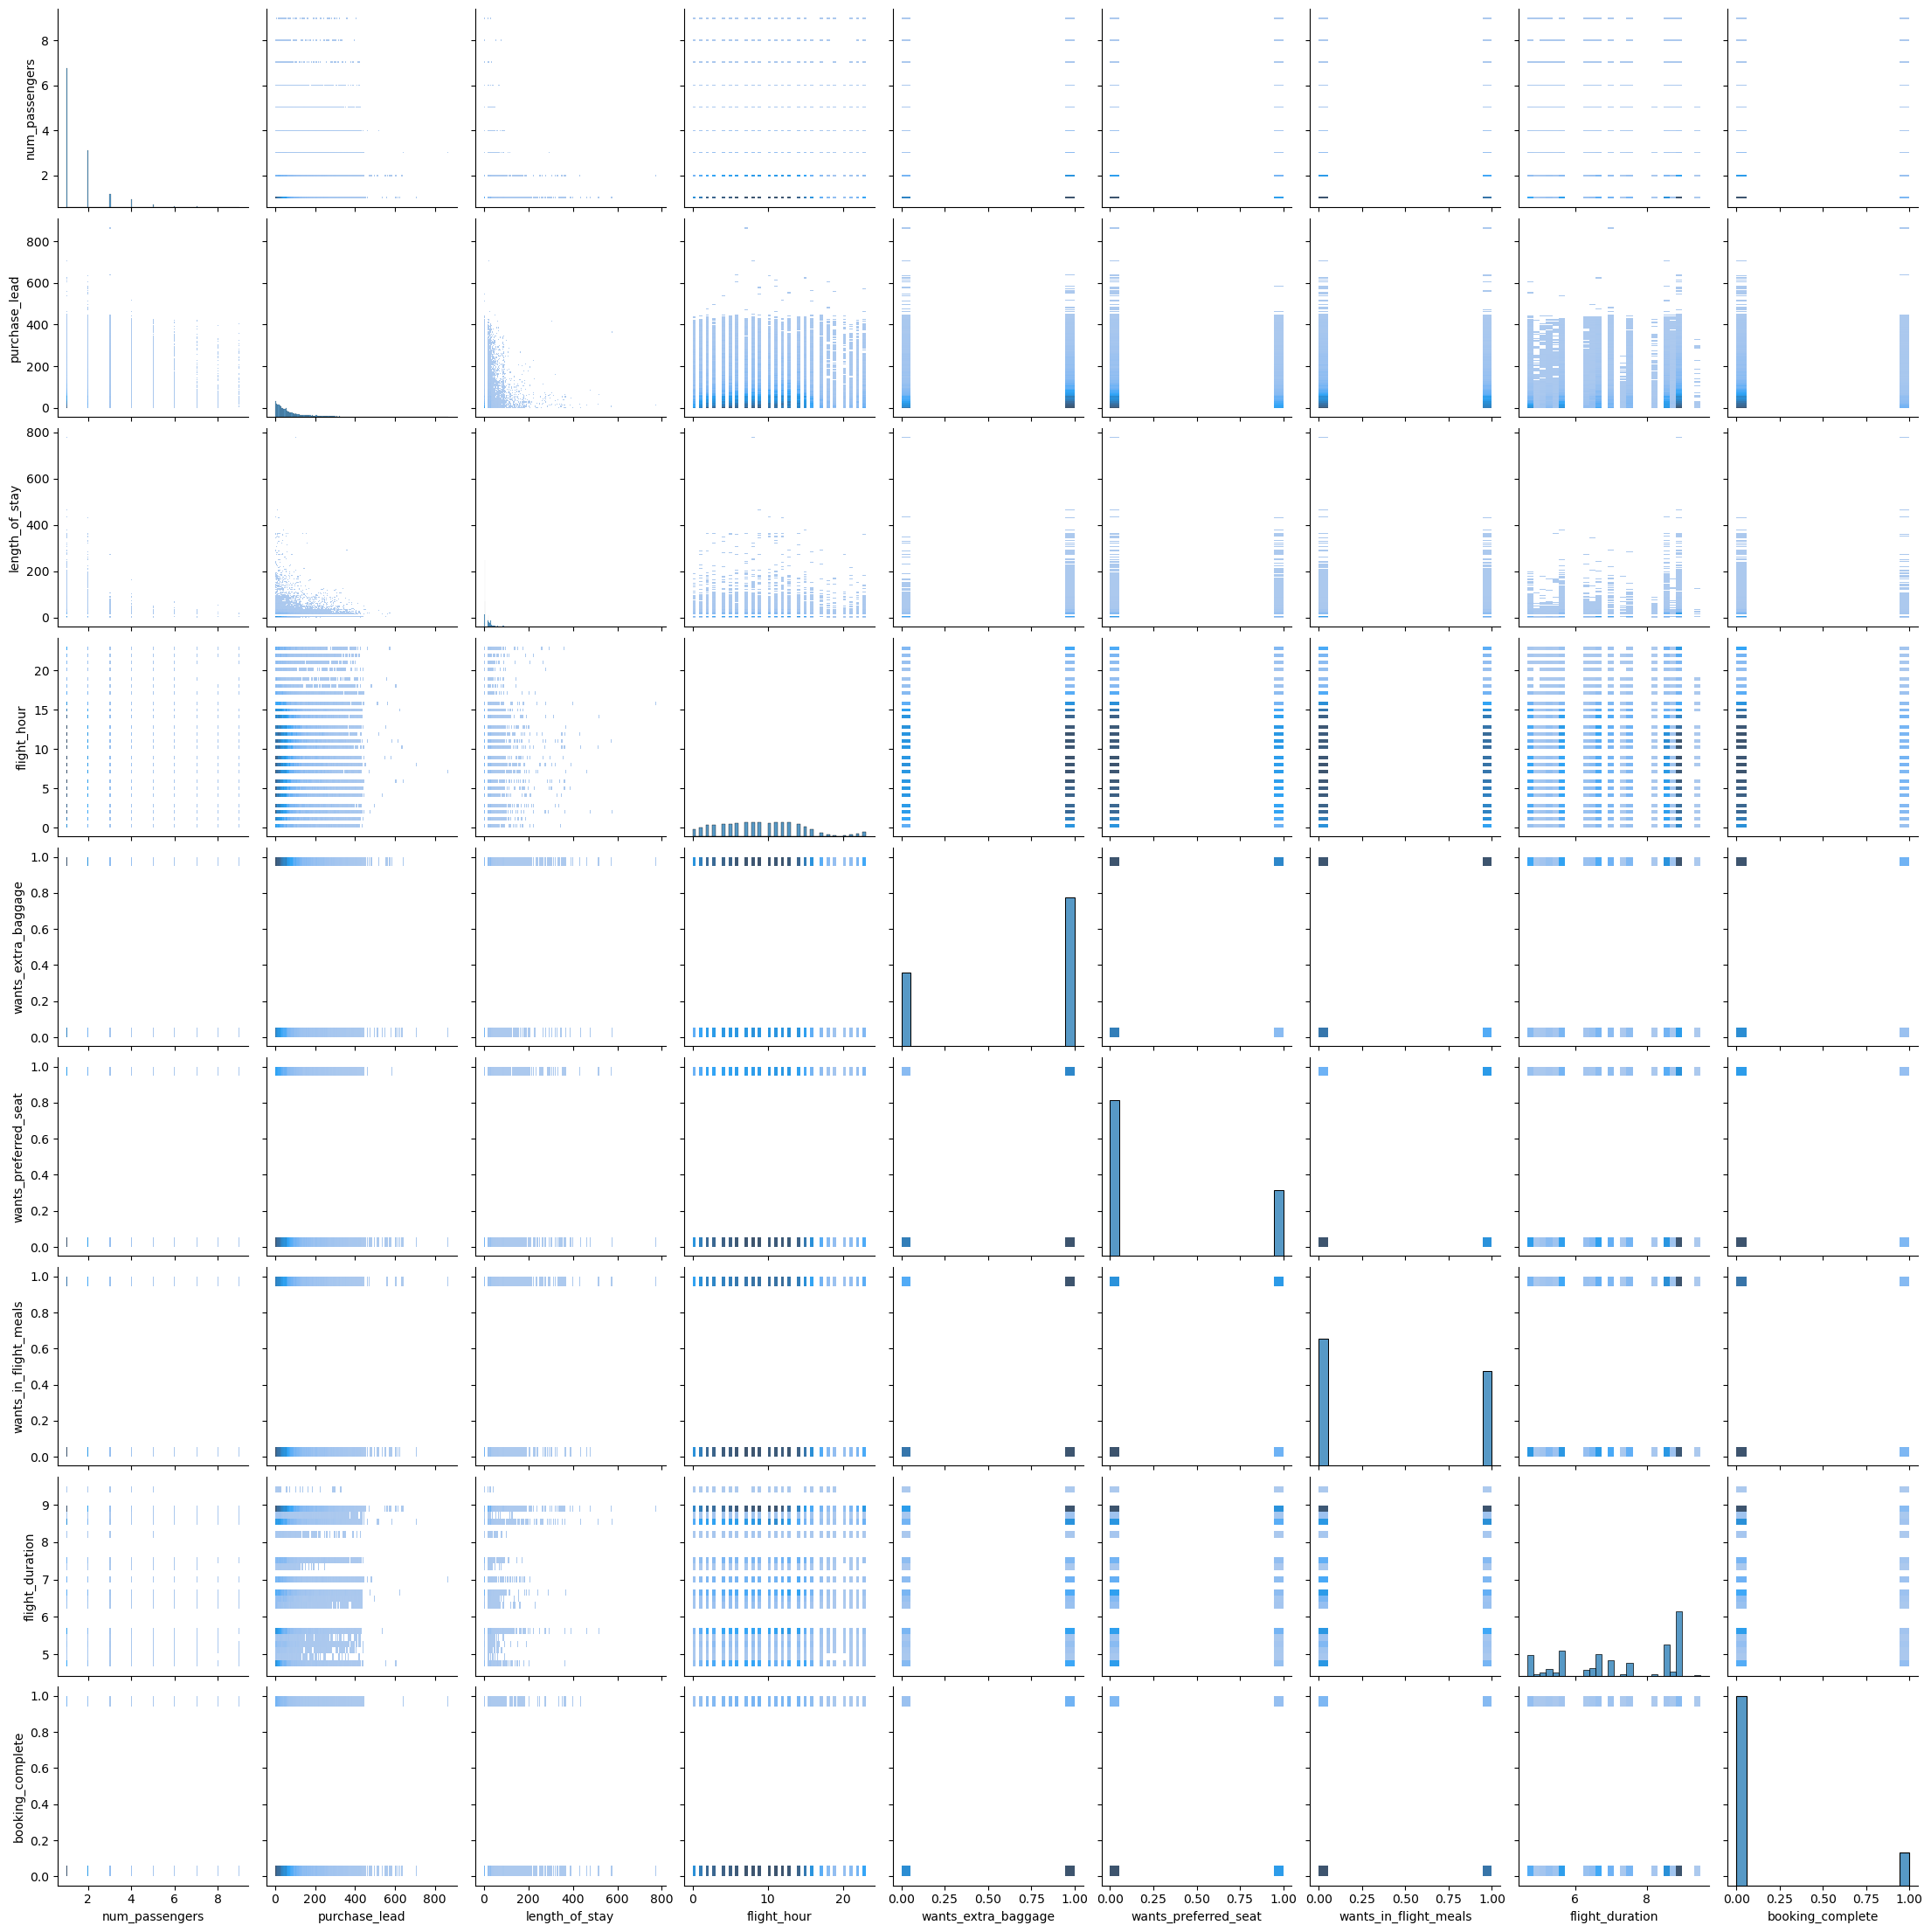

In [ ]:
# Pair plot for numerical features
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']

data =df[numerical_columns]
sns.pairplot(df[numerical_columns], kind="hist")
plt.show()

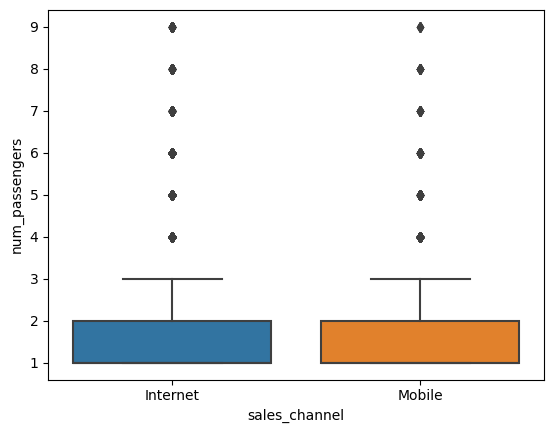

In [ ]:
#box plot

sns.boxplot(data=df, x='sales_channel', y='num_passengers')
plt.show()

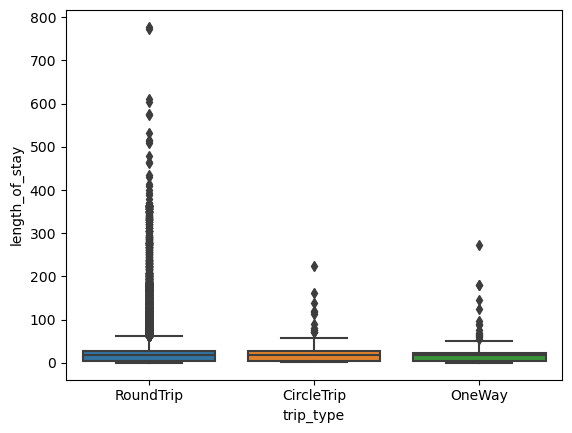

In [ ]:
sns.boxplot(x='trip_type', y='length_of_stay', data=df)
plt.show()

In [ ]:
print('Numerical columns',numerical_columns)
print('Categorical features',categorical_columns)

Numerical columns ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
Categorical features ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


## 5. Categorical Variable Analysis:

`Cross-Tabulation`: Explore relationships between categorical variables using cross-tabulations

In [ ]:
# Cross-tabulation
crosstab_result = pd.crosstab(df['trip_type'], df['booking_complete'])
print(crosstab_result)


booking_complete      0     1
trip_type                    
CircleTrip          111     5
OneWay              367    20
RoundTrip         42044  7453


In [ ]:
cross_tab2 =pd.crosstab(df['flight_day'], df['booking_complete'])
print(cross_tab2)

booking_complete     0     1
flight_day                  
Fri               5778   983
Mon               6898  1204
Sat               4951   861
Sun               5627   927
Thu               6302  1122
Tue               6544  1129
Wed               6422  1252


In [ ]:
cross_tab3 =pd.crosstab(df['sales_channel'], df['booking_complete'])
print(cross_tab3)

booking_complete      0     1
sales_channel                
Internet          37513  6869
Mobile             5009   609


In [ ]:
cross_tab4 =pd.crosstab(df['route'], df['booking_complete'])
print(cross_tab4)

booking_complete   0  1
route                  
AKLDEL            20  0
AKLHGH             1  0
AKLHND             2  0
AKLICN            70  0
AKLKIX             8  0
...               .. ..
TRZWUH            13  0
TRZXIY             6  0
TWUWUH             1  1
TWUXIY             5  2
URTXIY             1  0

[799 rows x 2 columns]


In [ ]:
df['route'].value_counts().sort_values(ascending=False).head(10)

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: route, dtype: int64

In [41]:
lst_10= df['route'].value_counts().sort_values(ascending=False).head(10).index
lst_10

Index(['AKLKUL', 'PENTPE', 'MELSGN', 'ICNSIN', 'DMKKIX', 'ICNSYD', 'DMKPER',
       'DPSICN', 'DMKOOL', 'MELPEN'],
      dtype='object')

In [42]:
for categories in lst_10:
    df[categories] =np.where(df['route']==categories,1,0)

In [43]:
lst_10 =list(lst_10)
lst_10.append('route')

In [44]:
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows

df[lst_10]

,AKLKUL,PENTPE,MELSGN,ICNSIN,DMKKIX,ICNSYD,DMKPER,DPSICN,DMKOOL,MELPEN,route
0,0,0,0,0,0,0,0,0,0,0,AKLDEL
1,0,0,0,0,0,0,0,0,0,0,AKLDEL
2,0,0,0,0,0,0,0,0,0,0,AKLDEL
3,0,0,0,0,0,0,0,0,0,0,AKLDEL
4,0,0,0,0,0,0,0,0,0,0,AKLDEL
...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,PERPNH
49996,0,0,0,0,0,0,0,0,0,0,PERPNH
49997,0,0,0,0,0,0,0,0,0,0,PERPNH
49998,0,0,0,0,0,0,0,0,0,0,PERPNH


In [45]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,AKLKUL,PENTPE,MELSGN,ICNSIN,DMKKIX,ICNSYD,DMKPER,DPSICN,DMKOOL,MELPEN
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,...,0,0,0,0,0,0,0,0,0,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df['booking_origin'].value_counts().sort_values(ascending=False).head(15)

Australia        17872
Malaysia          7174
South Korea       4559
Japan             3885
China             3387
Indonesia         2369
Taiwan            2077
Thailand          2030
India             1270
New Zealand       1074
Singapore         1044
United States      456
Vietnam            388
Macau              304
Hong Kong          295
Name: booking_origin, dtype: int64

In [47]:
lst_15 = df['booking_origin'].value_counts().sort_values(ascending=False).head(15).index
lst_15 = list(lst_15)

In [48]:
for categories in lst_15:
    df[categories] =np.where(df['booking_origin'] ==categories,1,0)

In [49]:
lst_15.append('booking_origin')

In [50]:
df[lst_15]

,Australia,Malaysia,South Korea,Japan,China,Indonesia,Taiwan,Thailand,India,New Zealand,Singapore,United States,Vietnam,Macau,Hong Kong,booking_origin
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,New Zealand
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,New Zealand
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,India
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,New Zealand
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Australia
49996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Australia
49997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Australia
49998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Australia


In [51]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,Indonesia,Taiwan,Thailand,India,New Zealand,Singapore,United States,Vietnam,Macau,Hong Kong
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,...,0,0,0,0,1,0,0,0,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,...,0,0,0,0,1,0,0,0,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,...,0,0,0,1,0,0,0,0,0,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,...,0,0,0,0,1,0,0,0,0,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,...,0,0,0,1,0,0,0,0,0,0


## 6. Outlier Detection:

`Identify Outliers`: Use boxplots or IQR (Interquartile Range) to identify outliers in numerical features.

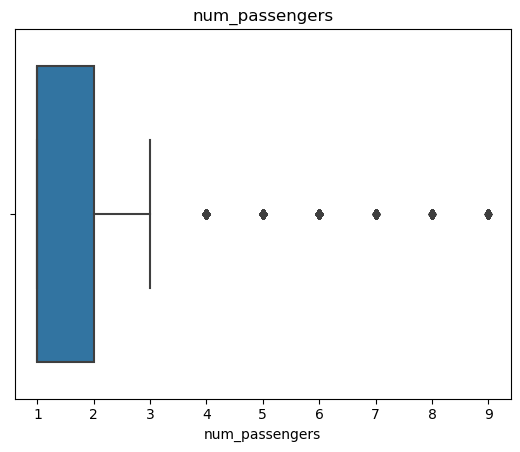

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64


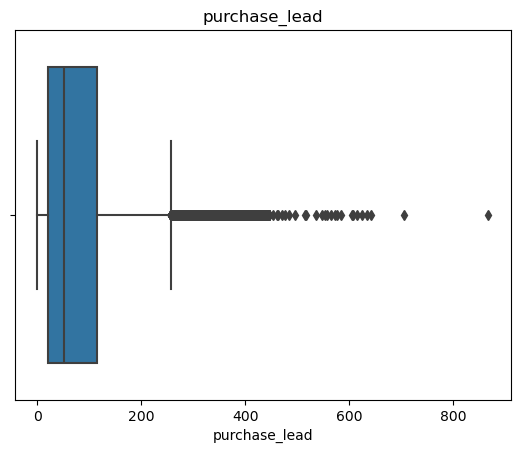

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64


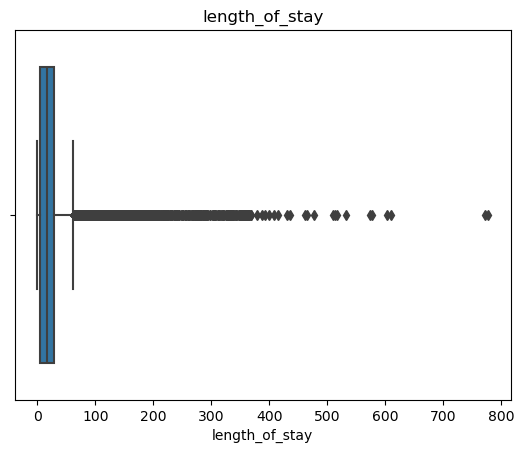

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64


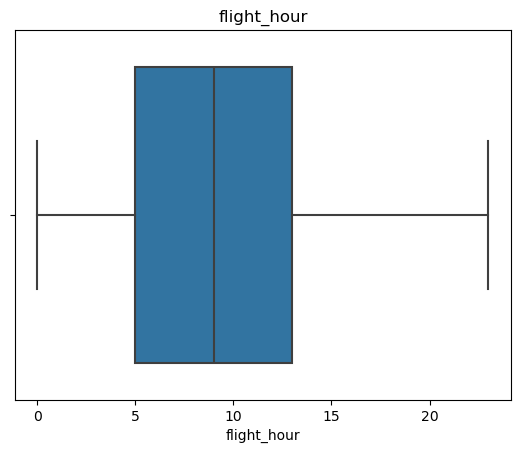

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64


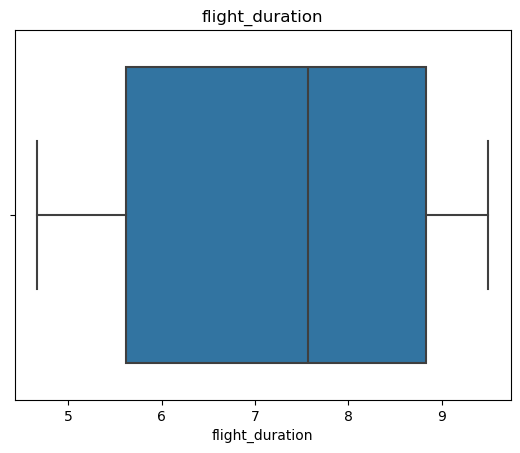

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64


In [ ]:
#detect outlier using boxplot
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
for column in numerical_columns:
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

    print(df[column].value_counts())


In [52]:
#Handle outliers using IQR
data =df.copy()
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
for column in numerical_columns:
    Q1 =data[column].quantile(0.25)
    Q3 =data[column].quantile(0.75)
    IQR =Q3-Q1
    #print(f'Q1 of {column} is {Q1}')
    #print(f'Q3 of {column} is {Q3}')
    #print(f'IQR of {column} is {IQR}')


    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    #print(f'Upper bound of {column} is {upper_bound}')
    #print(f'Lower bound of {column} is {lower_bound}')
    outlier =df[((df[column]<lower_bound) | (df[column]>upper_bound))]

    median_val =data[column].median()

    #data[column] = data[column].apply(lambda x: median_val if (x < lower_bound or  x > upper_bound) else x)
    data[column] = data[column].apply(lambda x: upper_bound if x>upper_bound else(median_val if x<lower_bound else x))


In [53]:
data['purchase_lead'].median(), data['purchase_lead'].max()

(51.0, 256.0)

In [54]:
data.shape

(50000, 39)

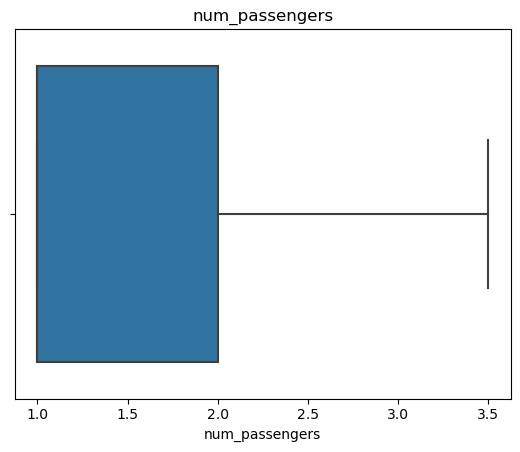

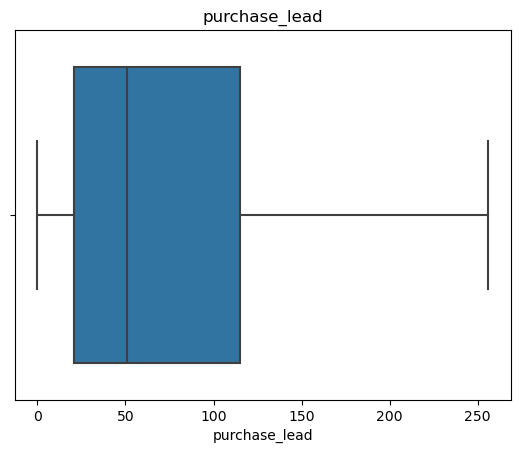

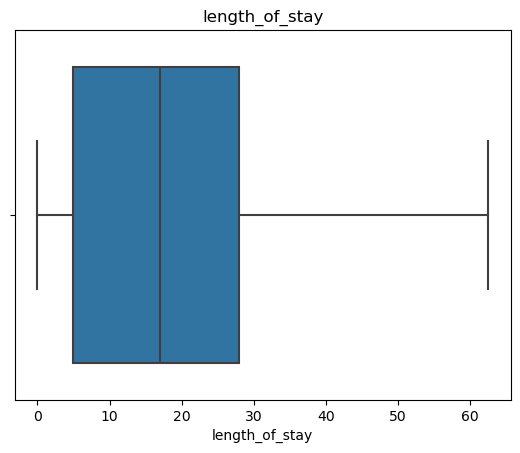

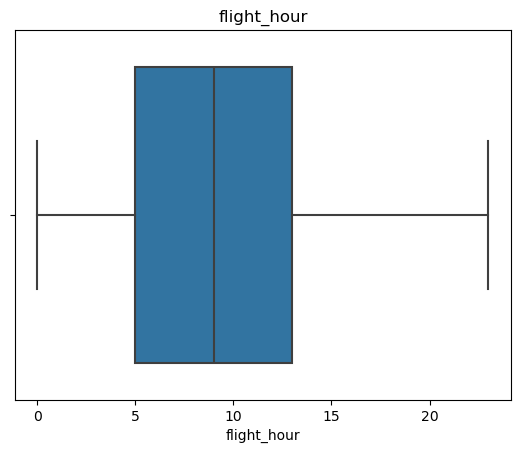

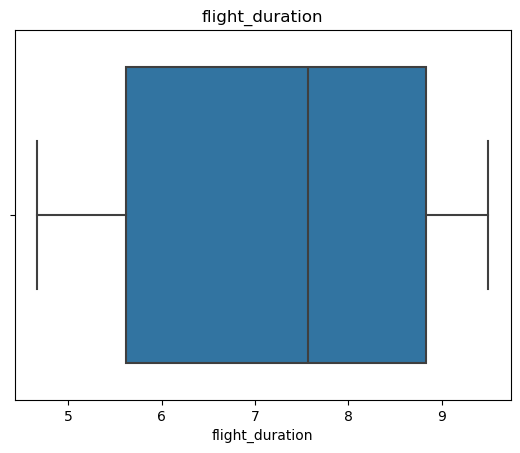

In [19]:
#print after removing outlier
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
for column in numerical_columns:
    sns.boxplot(data=data, x=column)
    plt.title(column)
    plt.show()

### To preprocess data for modeling:

1. Handling Missing Values:

2. Encoding Categorical Variables:

Convert categorical variables into numerical format.
Use techniques like One-Hot Encoding for nominal variables and Label Encoding for ordinal variables.

3. Feature Scaling:

Normalize or standardize numerical features to ensure that they are on the same scale.
Techniques like Min-Max Scaling or Standardization (Z-score normalization) are commonly used.

5. Splitting the Data into Training and Testing Sets:

Split your dataset into training and testing sets to evaluate your model's performance

In [ ]:
#handle missing values

data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [55]:
data.columns, data.shape

(Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
        'length_of_stay', 'flight_hour', 'flight_day', 'route',
        'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
        'wants_in_flight_meals', 'flight_duration', 'booking_complete',
        'AKLKUL', 'PENTPE', 'MELSGN', 'ICNSIN', 'DMKKIX', 'ICNSYD', 'DMKPER',
        'DPSICN', 'DMKOOL', 'MELPEN', 'Australia', 'Malaysia', 'South Korea',
        'Japan', 'China', 'Indonesia', 'Taiwan', 'Thailand', 'India',
        'New Zealand', 'Singapore', 'United States', 'Vietnam', 'Macau',
        'Hong Kong'],
       dtype='object'),
 (50000, 39))

In [56]:
data['total_service_requested'] =data['wants_extra_baggage']+data['wants_preferred_seat']+data['wants_in_flight_meals']

In [57]:
#Rearrange dataframe

data = data.drop(columns=['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','route', 'booking_origin'], axis=1)

In [58]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete,AKLKUL,...,Taiwan,Thailand,India,New Zealand,Singapore,United States,Vietnam,Macau,Hong Kong,total_service_requested
0,2.0,Internet,RoundTrip,256.0,19.0,7,Sat,5.52,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.0,Internet,RoundTrip,112.0,20.0,3,Sat,5.52,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,Internet,RoundTrip,243.0,22.0,17,Wed,5.52,0,0,...,0,0,1,0,0,0,0,0,0,2
3,1.0,Internet,RoundTrip,96.0,31.0,4,Sat,5.52,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2.0,Internet,RoundTrip,68.0,22.0,15,Wed,5.52,0,0,...,0,0,1,0,0,0,0,0,0,2


In [59]:
data['total_service_requested'].value_counts()

1    18216
2    12559
0    10455
3     8770
Name: total_service_requested, dtype: int64

In [60]:
#Handle categorical variables

#categorical_columns =[column for column in data.columns if data[column].dtypes =='O']
categorical_columns =['sales_channel', 'trip_type', 'flight_day']
numerical_columns   =[column for column in data.columns if data[column].dtypes !='O']

In [61]:
#apply onehot encoding
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [62]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete,AKLKUL,PENTPE,MELSGN,ICNSIN,...,total_service_requested,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2.0,256.0,19.0,7,5.52,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,1.0,112.0,20.0,3,5.52,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2.0,243.0,22.0,17,5.52,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,1
3,1.0,96.0,31.0,4,5.52,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2.0,68.0,22.0,15,5.52,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,1


In [63]:
data.shape , data.columns

((50000, 41),
 Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
        'flight_duration', 'booking_complete', 'AKLKUL', 'PENTPE', 'MELSGN',
        'ICNSIN', 'DMKKIX', 'ICNSYD', 'DMKPER', 'DPSICN', 'DMKOOL', 'MELPEN',
        'Australia', 'Malaysia', 'South Korea', 'Japan', 'China', 'Indonesia',
        'Taiwan', 'Thailand', 'India', 'New Zealand', 'Singapore',
        'United States', 'Vietnam', 'Macau', 'Hong Kong',
        'total_service_requested', 'sales_channel_Mobile', 'trip_type_OneWay',
        'trip_type_RoundTrip', 'flight_day_Mon', 'flight_day_Sat',
        'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed'],
       dtype='object'))

In [74]:
#split dataset to train test
from sklearn.model_selection import train_test_split

X =data.drop(columns=['booking_complete'], axis=1)
y =data['booking_complete']

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=42 )

In [75]:
X.shape, y.shape, X_train.shape, X_test.shape

((50000, 40), (50000,), (35000, 40), (15000, 40))

In [76]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

- Dataset is not balance

`class 0`   has  42522 records

`class 1`   has   7478 records

Name: booking_complete, dtype: int64
- Need to apply some techniques to balance the data

In [ ]:
!pip install imblearn

In [77]:
#Apply SMOTE to balance the training set
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=42)

X_train_balanced, y_train_balanced =smote.fit_resample(X_train, y_train)

In [78]:
y_train_balanced.value_counts() ,X_train_balanced.shape, y_train_balanced.shape

(0    29738
 1    29738
 Name: booking_complete, dtype: int64,
 (59476, 40),
 (59476,))

In [ ]:
# now train data is balanced

In [86]:
#feature scaling :Normalize or standardize numerical features to ensure that they are on the same scale.

from sklearn.preprocessing import StandardScaler

for column in numerical_columns:
    if column == 'booking_complete':
        break

    scaler = StandardScaler()
    data[column]   = scaler.fit_transform(data[[column]])

In [87]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete,AKLKUL,PENTPE,MELSGN,ICNSIN,...,total_service_requested,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,0.629044,2.291095,-0.018739,-0.381764,-1.174175,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,-0.678387,0.416796,0.035841,-1.120780,-1.174175,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0.629044,2.121887,0.145002,1.465775,-1.174175,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,1
3,-0.678387,0.208541,0.636226,-0.936026,-1.174175,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,0.629044,-0.155906,0.145002,1.096267,-1.174175,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,1


### 3. Model Selection and Training:

`Choose a Model`:
Select an appropriate model for your task. For binary classification (e.g., predicting booking_complete), common models include Logistic Regression, Random Forest, Support Vector Machines (SVM), and Gradient Boosting.

`Train the Model`: Fit the selected model on the training data.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [89]:
#Evaluate the model

y_pred =model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy =accuracy_score(y_test, y_pred)
print(f'accuracy : {accuracy * 100:.2f}%')

accuracy : 83.12%


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12784
           1       0.36      0.19      0.25      2216

    accuracy                           0.83     15000
   macro avg       0.62      0.57      0.58     15000
weighted avg       0.80      0.83      0.81     15000



##### Class 0 (Negative Class):
`Precision` = 0.87:

Out of all the instances that the model predicted as class 0, 87% were actually class 0.
This indicates a relatively low rate of false positives.

`Recall` = 0.98:

Out of all the instances that were actually class 0, 98% were correctly identified by the model.
The model is very effective at capturing almost all negative instances, with a low false negative rate.

`F1-Score` = 0.92:

The F1-score, which balances precision and recall, is high for class 0. This indicates that the model is both precise and sensitive when predicting the negative class.

`Support` = 8520:
There are 8520 instances of class 0 in the dataset.

##### Class 1 (Positive Class):
`Precision` = 0.51:
Out of all the instances predicted as class 1, only 51% were actually class 1.
This indicates a higher rate of false positives when predicting the positive class.
`Recall` = 0.13:
Out of all the actual class 1 instances, only 13% were correctly identified by the model.
The model is missing a significant number of true positive instances, resulting in a high false negative rate.
`F1-Score` = 0.21:
The F1-score is low for class 1, reflecting poor performance in terms of both precision and recall.
`Support` = 1480:
There are 1480 instances of class 1 in the dataset.


#### Overall Model Performance:
Accuracy = 0.85:

The model correctly predicts the class of 85% of all instances in the dataset.
While this seems high, it's important to consider the class imbalance and the poor performance on class 1.
Macro Average (macro avg):

Precision = 0.69: This is the unweighted average of the precision values for both classes.
Recall = 0.55: This is the unweighted average of the recall values for both classes.
F1-Score = 0.56: This is the unweighted average of the F1-scores for both classes.
The macro average treats both classes equally, regardless of their support. It indicates that, overall, the model's performance is moderate, with a significant drop in recall, particularly due to the poor recall of class 1.
Weighted Average (weighted avg):

Precision = 0.81: This average takes into account the number of instances (support) in each class. Since class 0 dominates, the weighted precision is closer to that of class 0.
Recall = 0.85: The weighted recall is higher because of the strong performance on the more frequent class 0.
F1-Score = 0.81: Similarly, the weighted F1-score is higher due to the better performance on class 0.
The weighted average is more representative of the overall model performance when considering the class distribution. However, it can mask the poor performance on the minority class.

### Interpretation:

- Class Imbalance: The model performs well on the majority class (0) but poorly on the minority class (1). This is a common issue when dealing with imbalanced datasets.
- Low Recall for Class 1: The recall for class 1 is particularly low, meaning the model fails to identify most positive cases. This could be problematic in applications where identifying the positive class is critical.
- High Precision for Class 0: The model is very precise in predicting the negative class, meaning it has a low false positive rate for class 0.


In [92]:
print(confusion_matrix( y_test, y_pred))

[[12042   742]
 [ 1790   426]]


- True Negative (TN) = 8331:
These are the instances where the actual class was 0 (negative), and the model correctly predicted 0.
- False Positive (FP) = 189:
These are the instances where the actual class was 0, but the model incorrectly predicted 1. This is also known as a `Type I error`.
- False Negative (FN) = 1286:
These are the instances where the actual class was 1 (positive), but the model incorrectly predicted 0. This is known as a `Type II error`.
- True Positive (TP) = 194:
These are the instances where the actual class was 1, and the model correctly predicted 1.



#### Interpretation:
- High True Negatives (8331): The model is very good at identifying the negative class (0).
- Low True Positives (194): The model struggles to correctly identify the positive class (1).
- High False Negatives (1286): Many positive cases are being missed by the model.
- False Positives (189): A relatively small number of negatives are incorrectly classified as positives.

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.73


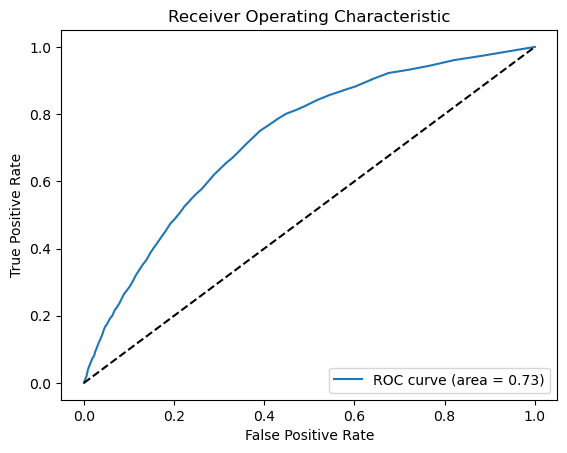

In [94]:
# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Model train using Xgboost

from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(random_state=42)

model2.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracyaccuracy = accuracy_score(y_test, y_pred)
accuracy

0.7912666666666667

In [ ]:
#Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy =accuracy_score(y_test, y_pred)
print(f'accuracy : {accuracy * 100:.2f}%')

#print classification report
print(classification_report(y_test, y_pred))

#print confusion matrix
print(confusion_matrix( y_test, y_pred))

accuracy : 79.13%
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     12784
           1       0.21      0.14      0.17      2216

    accuracy                           0.79     15000
   macro avg       0.53      0.52      0.52     15000
weighted avg       0.76      0.79      0.78     15000

[[11550  1234]
 [ 1897   319]]


In [ ]:
#finetune xgboost
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 500],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth'    : [3,4,5,6,7,8],
    'learning_rate':[0.1,0.01,0.001]
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

fine_tuner =GridSearchCV(estimator=model2,
    param_grid=param_grid,
    cv=5,n_jobs=-1)

In [ ]:
fine_tuner.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#model train using logistic regression

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train_balanced, y_train_balanced)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred =model1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7413333333333333

In [ ]:
print(confusion_matrix( y_test, y_pred))

[[11085  1699]
 [ 1918   298]]


#save the preproccess data set for finetuning

- Address Class Imbalance: Consider techniques like oversampling the minority class, undersampling the majority class, or using class-weighted models to improve performance on class 1.

- Try Different Models or Hyperparameters: Some models, or adjusting hyperparameters, might improve the balance between precision and recall for class 1.

- Evaluate with Additional Metrics: Metrics like the ROC-AUC score can provide further insights, especially in imbalanced scenarios.

In [ ]:
data.to_csv('preprocessed_customer_booking.csv')

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


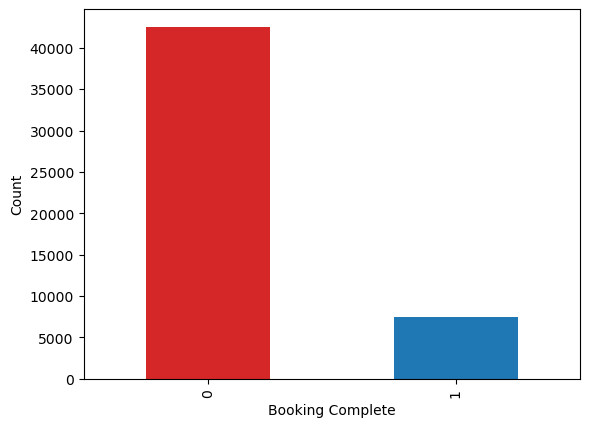

0    42522
1     7478
Name: booking_complete, dtype: int64


In [29]:
columns =['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete']


import matplotlib.pyplot as plt

# Get unique values of a specific column
unique_values = df[i].unique()

# Count occurrences of each value in the 'booking_complete' column
value_count = df['booking_complete'].value_counts()

bar_colors = ['tab:red', 'tab:blue']
# Plot the value counts as a bar chart
value_count.plot(kind='bar', color=bar_colors)

# Add labels and title
plt.xlabel('Booking Complete')
plt.ylabel('Count')
#plt.title('Behavior_of_Booking_Completed')

# Display the plot
plt.show()

print(value_count)